# Part 1: Noise Removal

1. Install Graphcuts for Python by installing from here. Ensure that your python can call "import pygco" (in some setting pygco.py, originally in the gco folder, should be able to be called from your code). On the website, the execution of "make download" might give you an error message, but you don't need to worry as the graphcut code is already provided in the "gco_source" folder.

In [1]:
import gco.pygco as pygco
import matplotlib.pyplot as plt
import numpy as np
import cv2

/opt/anaconda3/envs/nus/lib/python3.9/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


2. Write a python program to clean up the noise of the image in Figure 1, by employing an MRF and the binary graphcuts. 

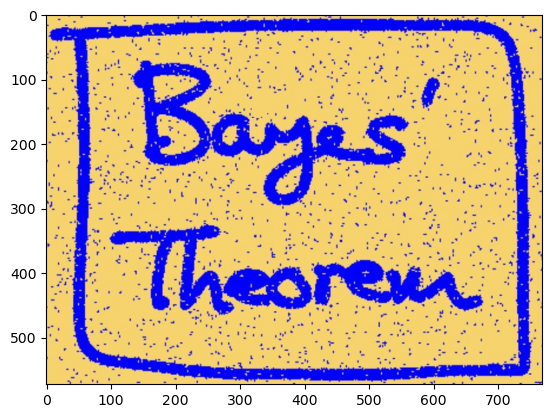

In [2]:
# read and show the original image:
img = cv2.imread("part1.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
SOURCE_COLOR = np.array([0, 0, 255]) # foreground: blue
SINK_COLOR = np.array([245, 210, 110]) #background: yellow

In [17]:
def dist(c1, c2):
    return np.sum(np.abs(c1 - c2)).mean() / 255

height, width = img.shape[:2]

# The data term is the distance between the pixel color and the source or sink color
data_term = np.zeros((height, width, 2)) 

for y in range(height):
    for x in range(width):
        c = img[y, x]
        data_term[y, x, 0] = dist(SOURCE_COLOR, c) # distance to source
        data_term[y, x, 1] = dist(SINK_COLOR, c) # distance to sink
        
prior_term = 1 - np.eye(2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


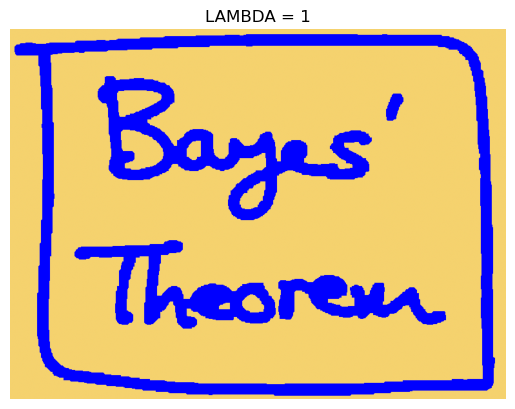

In [27]:
LAMBDA = 1 
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_term, n_iter=-1)
labels = labels.reshape(height, width)

denoised_image = np.zeros(img.shape)
for y in range(height):
    for x in range(width):
        if labels[y, x] == 1:
            denoised_image[y, x] = SINK_COLOR / 255 # background
        if labels[y, x] == 0:
            denoised_image[y, x] = SOURCE_COLOR # foreground

plt.imshow(denoised_image)
plt.title("LAMBDA = 1")
plt.axis('off')
plt.show()


3. Change the value of the weighting factor (lambda) of the prior term, and show some different results (due to different values of lambda). You must state the values of your lambda along with the corresponding results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


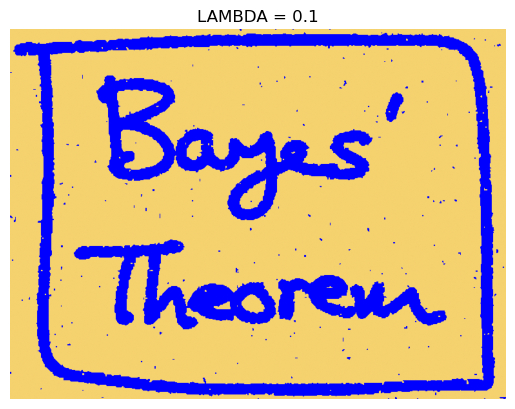

In [29]:
LAMBDA = 0.1 
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_term, n_iter=-1)
labels = labels.reshape(height, width)

denoised_image = np.zeros(img.shape)
for y in range(height):
    for x in range(width):
        if labels[y, x] == 1:
            denoised_image[y, x] = SINK_COLOR / 255 # background
        if labels[y, x] == 0:
            denoised_image[y, x] = SOURCE_COLOR # foreground

plt.imshow(denoised_image)
plt.title("LAMBDA = 0.1")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


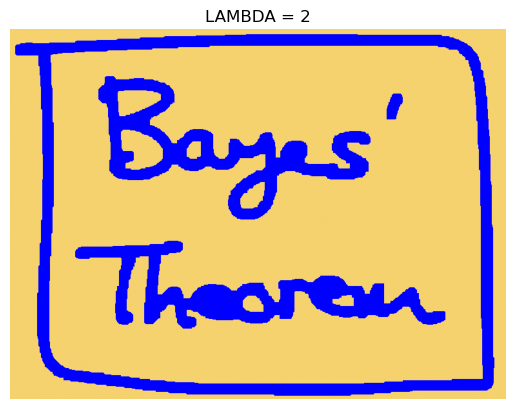

In [32]:
LAMBDA = 2 
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_term, n_iter=-1)
labels = labels.reshape(height, width)

denoised_image = np.zeros(img.shape)
for y in range(height):
    for x in range(width):
        if labels[y, x] == 1:
            denoised_image[y, x] = SINK_COLOR / 255 # background
        if labels[y, x] == 0:
            denoised_image[y, x] = SOURCE_COLOR # foreground

plt.imshow(denoised_image)
plt.title("LAMBDA = 2")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


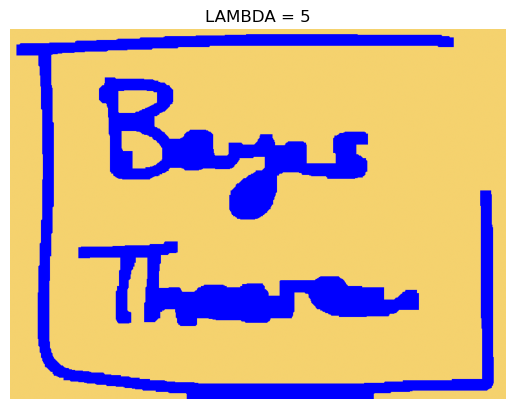

In [30]:
LAMBDA = 5 
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_term, n_iter=-1)
labels = labels.reshape(height, width)

denoised_image = np.zeros(img.shape)
for y in range(height):
    for x in range(width):
        if labels[y, x] == 1:
            denoised_image[y, x] = SINK_COLOR / 255 # background
        if labels[y, x] == 0:
            denoised_image[y, x] = SOURCE_COLOR # foreground

plt.imshow(denoised_image)
plt.title("LAMBDA = 5")
plt.axis('off')
plt.show()

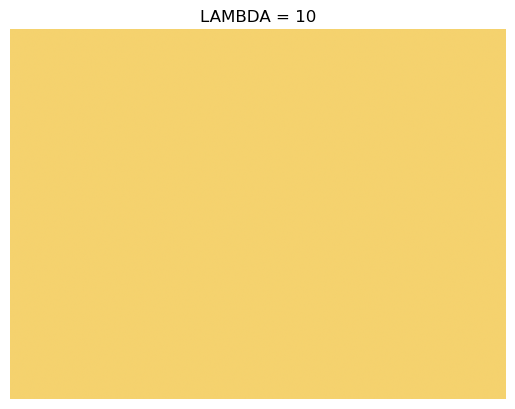

In [33]:
LAMBDA = 10
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_term, n_iter=-1)
labels = labels.reshape(height, width)

denoised_image = np.zeros(img.shape)
for y in range(height):
    for x in range(width):
        if labels[y, x] == 1:
            denoised_image[y, x] = SINK_COLOR / 255 # background
        if labels[y, x] == 0:
            denoised_image[y, x] = SOURCE_COLOR # foreground

plt.imshow(denoised_image)
plt.title("LAMBDA = 10")
plt.axis('off')
plt.show()

4. Show your best result and provide some discussion if necessary (particularly if the results are not as good as expected).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


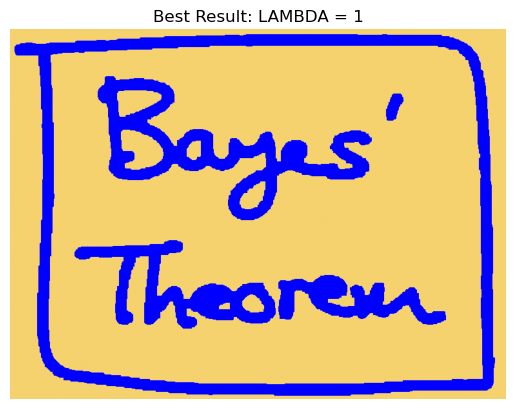

In [34]:
LAMBDA = 1 
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_term, n_iter=-1)
labels = labels.reshape(height, width)

denoised_image = np.zeros(img.shape)
for y in range(height):
    for x in range(width):
        if labels[y, x] == 1:
            denoised_image[y, x] = SINK_COLOR / 255 # background
        if labels[y, x] == 0:
            denoised_image[y, x] = SOURCE_COLOR # foreground

plt.imshow(denoised_image)
plt.title("Best Result: LAMBDA = 1")
plt.axis('off')
plt.show()

Discussion:
prior term provides a smoothing effect; the smaller the lambda value, the less impact the prior term has, resulting in more noise but also more details. As lambda value increases, the effect of the prior term grows, leading to a smoother image but potentially losing many details.